# 1. Libraries

In [350]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import plotly.graph_objects as go

# 2. Load data  

In [351]:
data = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/data/data_extraction.csv')
features_r2 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/evaluation/LR_best_features_r2.csv')
features_rmse = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/evaluation/LR_best_features_rmse.csv')
features_mape = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/evaluation/LR_best_features_mape.csv')

# 3. Model define

## 3.1 Data selection based the best metrics score

In [352]:
df = data.copy()
df = df.drop(columns=["fecha"])

In [353]:
best_features_r2 = features_r2['best_features'].apply(
    lambda x: list(ast.literal_eval(x)) if isinstance(x, str) else list(x)
).tolist()
best_features_rmse = features_rmse['best_features'].apply(
    lambda x: list(ast.literal_eval(x)) if isinstance(x, str) else list(x)
).tolist()
best_features_mape = features_mape['best_features'].apply(
    lambda x: list(ast.literal_eval(x)) if isinstance(x, str) else list(x)
).tolist()

## 3.2 Features based metrics results

In [354]:
lista_features_r2 = best_features_r2[2]
lista_features_rmse = best_features_rmse[2]
lista_features_mape = best_features_mape[2]

## 3.2.1 LR model based the best R2 metric 

In [355]:
X = df[lista_features_r2]
y = df["global_peak"].values.reshape(-1, 1)
if len(y.shape) == 1:
    y = y.reshape(-1, 1)
scaler_X = MinMaxScaler()  
scaler_y = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
y_pred_normalized = cross_val_predict(model, X_normalized, y_normalized, cv=kf)


y_pred = scaler_y.inverse_transform(y_pred_normalized)
y_true = scaler_y.inverse_transform(y_normalized)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

R² Score: 0.8470
RMSE: 0.3243
MAPE: 0.2819


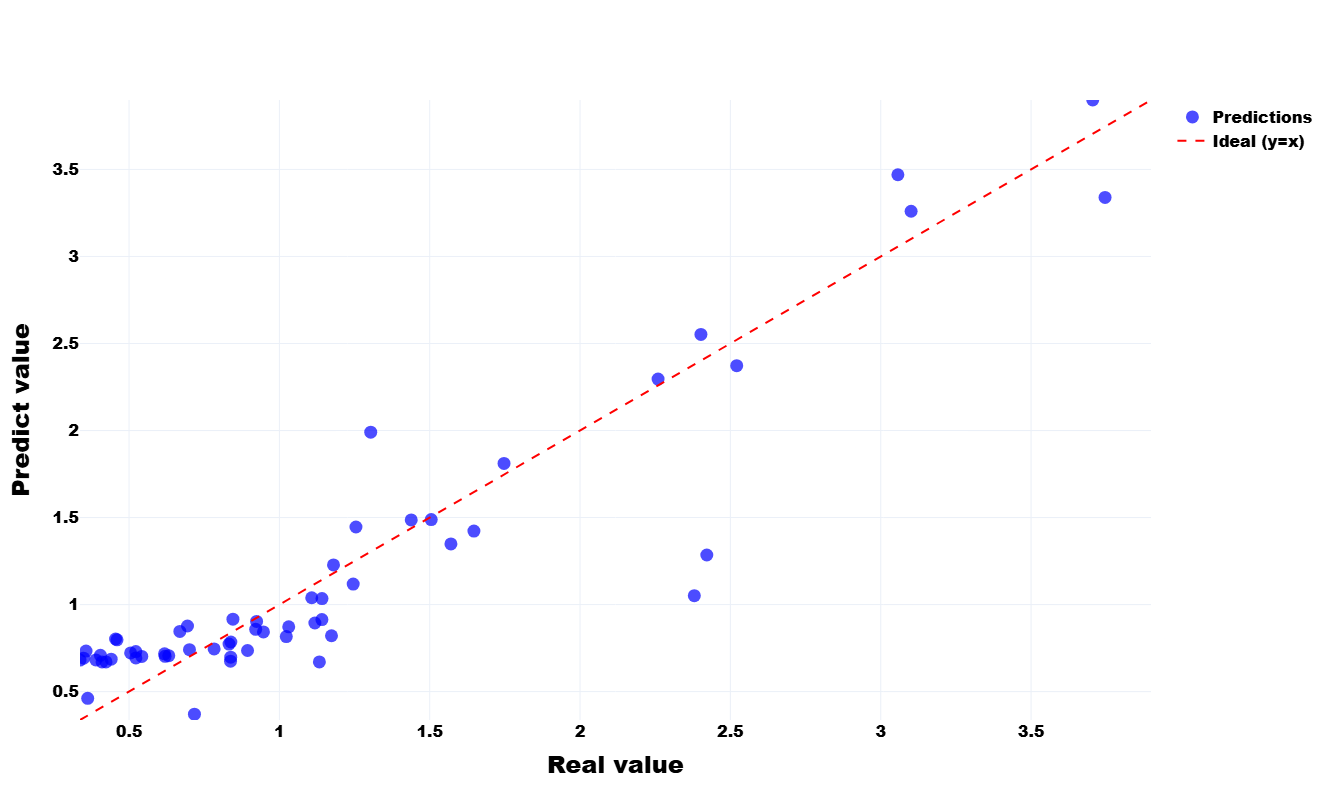

In [360]:
min_val = float(min(y_true.min(), y_pred.min()))
max_val = float(max(y_true.max(), y_pred.max()))

x_line = [min_val, max_val]
y_line = [min_val, max_val]

trace_pred_name = f"Predictions (W=3, R²={r2:.3f}, RMSE={rmse:.3f}, MAPE={mape:.3f})"

# Crear la figura
fig = go.Figure()

# Agregar las predicciones
fig.add_trace(go.Scatter(
    x=y_true.flatten(),
    y=y_pred.flatten(),
    mode='markers',
    marker=dict(color='blue', opacity=0.7,size=13),
    name="Predictions"
))

# Agregar la línea ideal (y=x)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    line=dict(dash='dash', color='red'),
    name="Ideal (y=x)"
))

# Actualizar el layout
fig.update_layout(
    xaxis_title="Real value",
    yaxis_title="Predict value",
    template="plotly_white",
    legend=dict(
        x=1.02, 
        y=1,
        font=dict(
            family="Arial Black",  # Fuente en negrita
            size=16,               # Tamaño del texto
            color="black"          # Color negro
        )
    ),
    
    width=1600,  # Establecer tamaño de la imagen en 1200x1200
    height=800,
    plot_bgcolor='white',
    paper_bgcolor='white',
)

# Configuración de los ejes x e y
fig.update_xaxes(
    range=[min_val, max_val],
    title_font=dict(size=24, family="Arial Black", color="black"),  # Negrita y color negro
    tickfont=dict(size=16, family="Arial Black", color="black", weight="bold")  # Negrita y color negro
)

fig.update_yaxes(
    range=[min_val, max_val],
    title_font=dict(size=24, family="Arial Black", color="black"),  # Negrita y color negro
    tickfont=dict(size=16, family="Arial Black", color="black", weight="bold")  # Negrita y color negro
)

fig.show()


## 3.2.2 LR model based the best RMSE metric 

In [361]:
X = df[lista_features_rmse]
y = df["global_peak"].values.reshape(-1, 1)
if len(y.shape) == 1:
    y = y.reshape(-1, 1)
scaler_X = MinMaxScaler()  
scaler_y = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
y_pred_normalized = cross_val_predict(model, X_normalized, y_normalized, cv=kf)


y_pred = scaler_y.inverse_transform(y_pred_normalized)
y_true = scaler_y.inverse_transform(y_normalized)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

R² Score: 0.8470
RMSE: 0.3243
MAPE: 0.2819


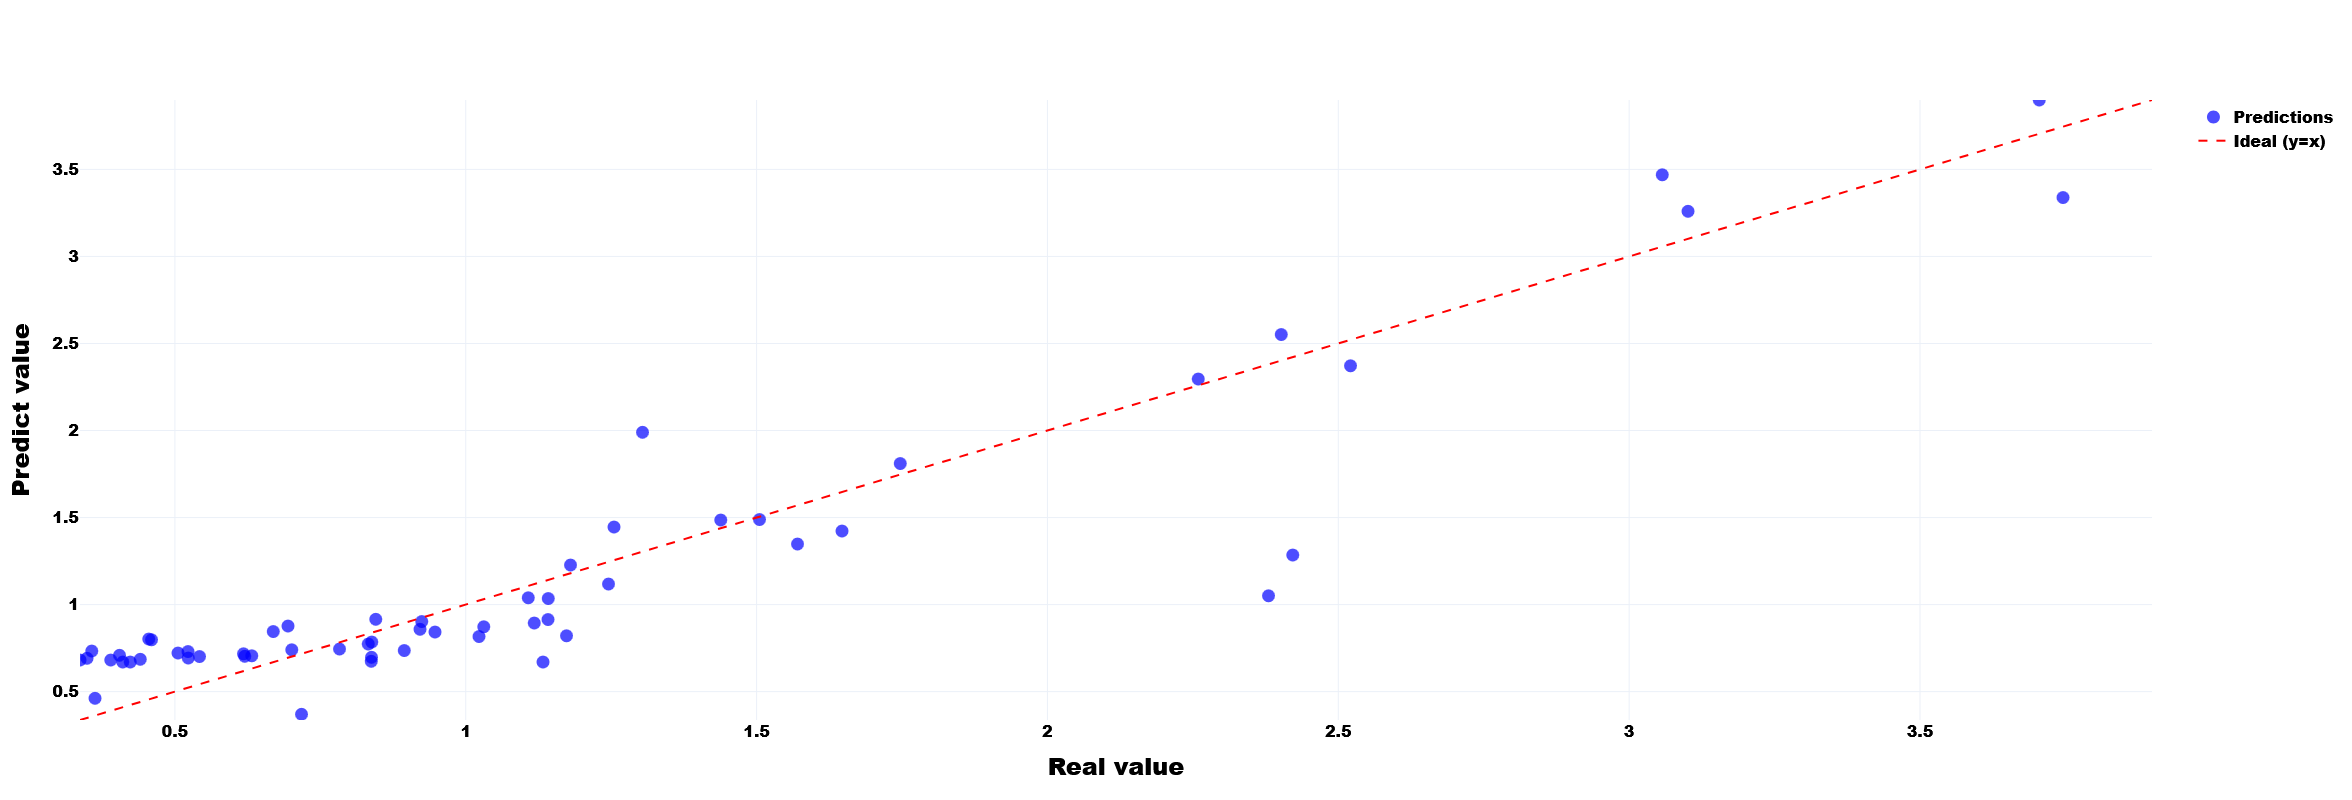

In [362]:
min_val = float(min(y_true.min(), y_pred.min()))
max_val = float(max(y_true.max(), y_pred.max()))

x_line = [min_val, max_val]
y_line = [min_val, max_val]

trace_pred_name = f"Predictions (W=3, R²={r2:.3f}, RMSE={rmse:.3f}, MAPE={mape:.3f})"

# Crear la figura
fig = go.Figure()

# Agregar las predicciones
fig.add_trace(go.Scatter(
    x=y_true.flatten(),
    y=y_pred.flatten(),
    mode='markers',
    marker=dict(color='blue', opacity=0.7,size=13),
    name="Predictions"
))

# Agregar la línea ideal (y=x)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    line=dict(dash='dash', color='red'),
    name="Ideal (y=x)"
))

# Actualizar el layout
fig.update_layout(
    xaxis_title="Real value",
    yaxis_title="Predict value",
    template="plotly_white",
    legend=dict(
        x=1.02, 
        y=1,
        font=dict(
            family="Arial Black",  # Fuente en negrita
            size=16,               # Tamaño del texto
            color="black"          # Color negro
        )
    ),
    
    width=1600,  # Establecer tamaño de la imagen en 1200x1200
    height=800,
    plot_bgcolor='white',
    paper_bgcolor='white',
)

# Configuración de los ejes x e y
fig.update_xaxes(
    range=[min_val, max_val],
    title_font=dict(size=24, family="Arial Black", color="black"),  # Negrita y color negro
    tickfont=dict(size=16, family="Arial Black", color="black", weight="bold")  # Negrita y color negro
)

fig.update_yaxes(
    range=[min_val, max_val],
    title_font=dict(size=24, family="Arial Black", color="black"),  # Negrita y color negro
    tickfont=dict(size=16, family="Arial Black", color="black", weight="bold")  # Negrita y color negro
)

fig.show()

## 3.2.3 LR model based the best MAPE metric 

In [363]:
X = df[lista_features_mape]
y = df["global_peak"].values.reshape(-1, 1)
if len(y.shape) == 1:
    y = y.reshape(-1, 1)
scaler_X = MinMaxScaler()  
scaler_y = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
y_pred_normalized = cross_val_predict(model, X_normalized, y_normalized, cv=kf)


y_pred = scaler_y.inverse_transform(y_pred_normalized)
y_true = scaler_y.inverse_transform(y_normalized)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

R² Score: 0.8193
RMSE: 0.3525
MAPE: 0.2693


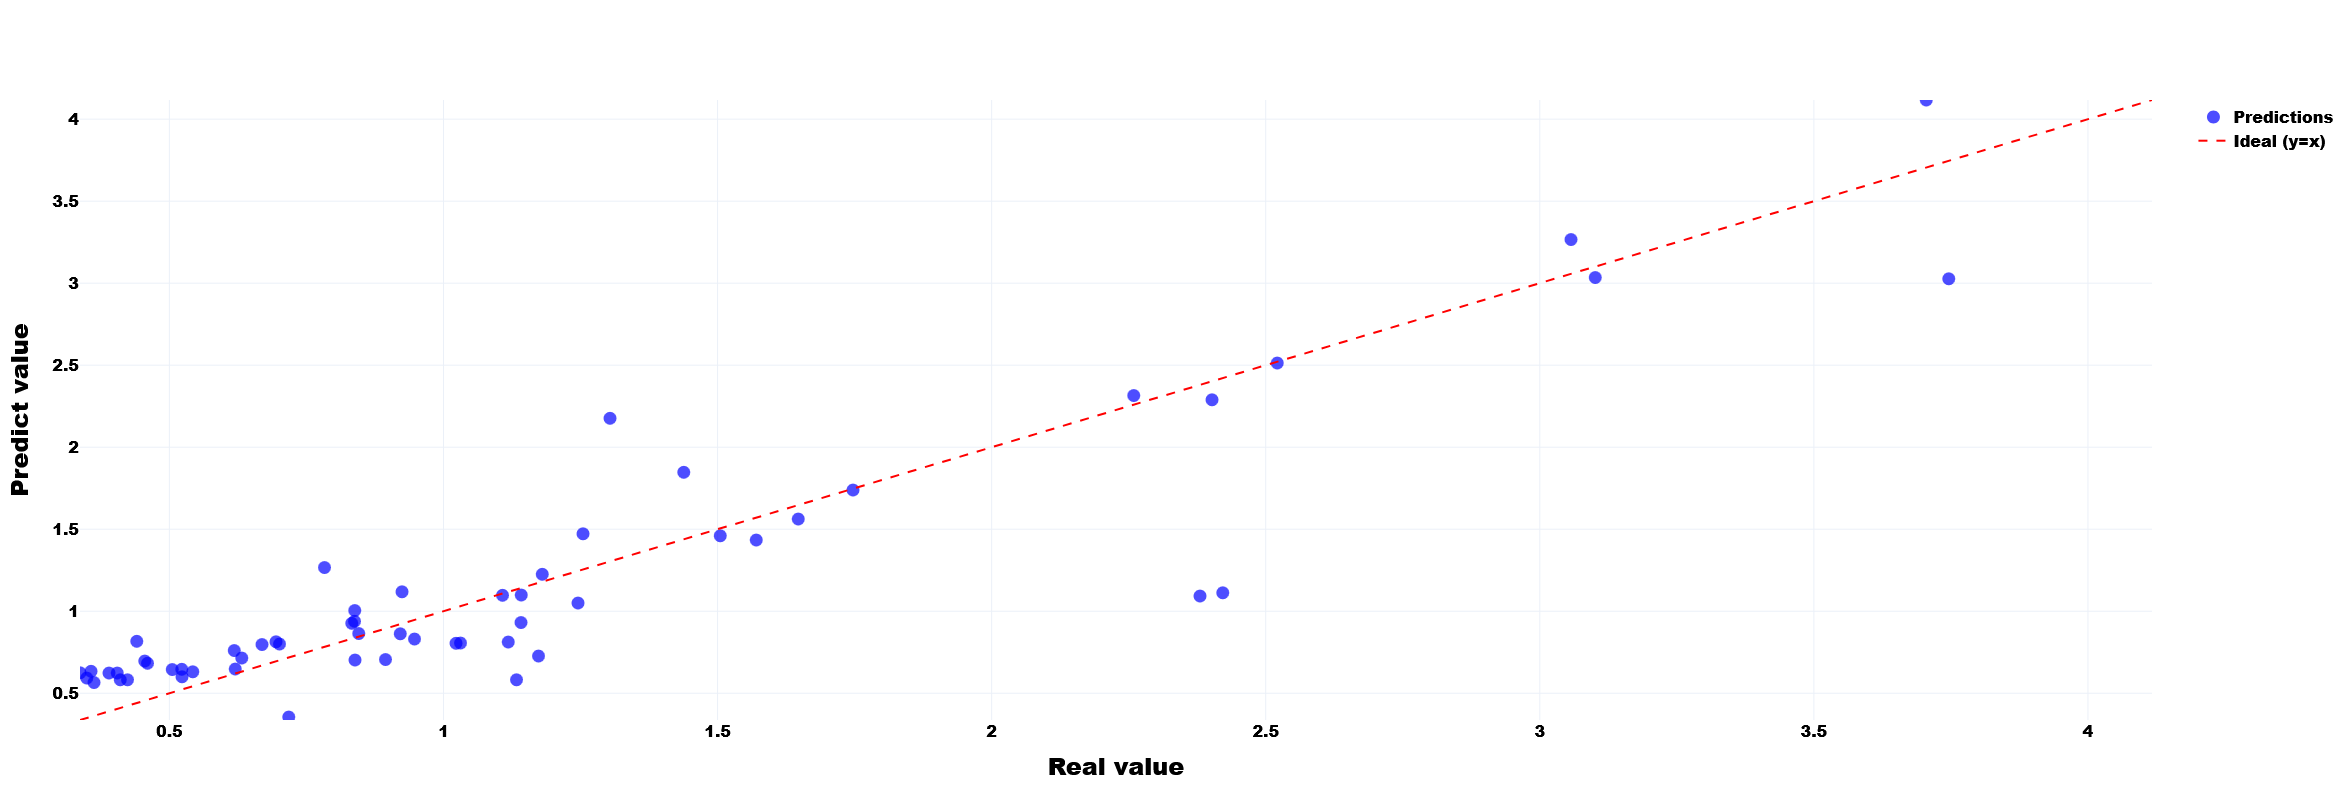

In [364]:
min_val = float(min(y_true.min(), y_pred.min()))
max_val = float(max(y_true.max(), y_pred.max()))

x_line = [min_val, max_val]
y_line = [min_val, max_val]

trace_pred_name = f"Predictions (W=3, R²={r2:.3f}, RMSE={rmse:.3f}, MAPE={mape:.3f})"

# Crear la figura
fig = go.Figure()

# Agregar las predicciones
fig.add_trace(go.Scatter(
    x=y_true.flatten(),
    y=y_pred.flatten(),
    mode='markers',
    marker=dict(color='blue', opacity=0.7,size=13),
    name="Predictions"
))

# Agregar la línea ideal (y=x)
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    line=dict(dash='dash', color='red'),
    name="Ideal (y=x)"
))

# Actualizar el layout
fig.update_layout(
    xaxis_title="Real value",
    yaxis_title="Predict value",
    template="plotly_white",
    legend=dict(
        x=1.02, 
        y=1,
        font=dict(
            family="Arial Black",  # Fuente en negrita
            size=16,               # Tamaño del texto
            color="black"          # Color negro
        )
    ),
    
    width=1600,  # Establecer tamaño de la imagen en 1200x1200
    height=800,
    plot_bgcolor='white',
    paper_bgcolor='white',
)

# Configuración de los ejes x e y
fig.update_xaxes(
    range=[min_val, max_val],
    title_font=dict(size=24, family="Arial Black", color="black"),  # Negrita y color negro
    tickfont=dict(size=16, family="Arial Black", color="black", weight="bold")  # Negrita y color negro
)

fig.update_yaxes(
    range=[min_val, max_val],
    title_font=dict(size=24, family="Arial Black", color="black"),  # Negrita y color negro
    tickfont=dict(size=16, family="Arial Black", color="black", weight="bold")  # Negrita y color negro
)

fig.show()